In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import random

In [141]:
Movies = pd.read_csv('Wins.txt')
# glimspe at the first 5 rows 
Movies.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [142]:
print(Movies.shape) # Its has 77 rows and 8 columns 
print(Movies.isna().sum()) # None exist 
print(Movies.isnull().sum()) # None exist 
print(Movies.duplicated().sum()) # There appear to be 2 rows that hold duplicated varaibles 


(77, 8)
Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64
Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64
2


In [209]:
# Changing Name  
Movies.rename({'Audience score %' : 'Crowd_Score'}, axis = 1, inplace = True)
Movies.rename({'Rotten Tomatoes %' :  'Dislikes'}, axis = 1, inplace = True)
Movies.rename({'Worldwide Gross' :  'Global_Gains'}, axis = 1, inplace = True)
Movies.rename({'Lead Studio' : 'Studio_Brand'}, axis = 1, inplace = True)
Movies.rename({'Profitability' : 'Profit'}, axis = 1, inplace = True)

In [144]:
# Verify the dataframe's columns original names were rename
print(Movies.columns)
# Evaluating each variabe and determining if it's current form is suitable for an effective data analysis 
print(Movies.dtypes)
# Some varables such as Global Gains illustrate as numeric  with an object and string type of classification

Index(['Film', 'Genre', 'Studio_Brand', 'Crowd_Score', 'Profit', 'Dislikes',
       'Global_Gains', 'Year'],
      dtype='object')
Film             object
Genre            object
Studio_Brand     object
Crowd_Score       int64
Profit          float64
Dislikes          int64
Global_Gains     object
Year              int64
dtype: object


In [145]:
# Global_Gains variable has must be coverted into an integer or a float due to it being quantitative at face value 
# It will be a huge influencial factor along with profit in determining which brand and genre sells and earns the most 
Matcher = lambda x : x.replace('$', '') # Strip the $ sign 
print(Movies.Global_Gains.dtypes) # It remain an object 
Movies['Global_Gains'] = Movies['Global_Gains'].astype('str') # ensure it is a string
Movies['Global_Gains'] = Movies['Global_Gains'].apply(Matcher) # apply the matcher lamba function 
print(Movies.Global_Gains.head()) # first five rows


object
0     41.94 
1     19.62 
2     26.66 
3     43.04 
4    219.37 
Name: Global_Gains, dtype: object


In [146]:
# convert the column into a float due to it's decimal . placed in the middle and for the purpose of calculating it 
Movies['Global_Gains'] = Movies['Global_Gains'].astype(float)  
 # ensure the previous astype conversion was sucessful
print(Movies.Global_Gains.dtype) 

float64


list of columns with a total of  8  unique 

Index(['Film', 'Genre', 'Studio_Brand', 'Crowd_Score', 'Profit', 'Dislikes',
       'Global_Gains', 'Year'],
      dtype='object') 

total films for each genre that contain more than one film 

Comedy : 41
Romance : 13
Drama : 13
Animation : 4


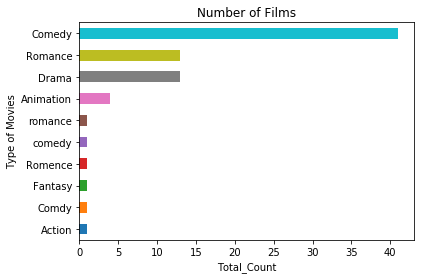

In [147]:
print("list of columns with a total of " , Movies.columns.nunique() ," unique \n")
print(Movies.columns, "\n")

Total = Movies.Genre.value_counts().sort_values(ascending = False)
print("total films for each genre that contain more than one film \n")
for i, g in Total.iteritems():
    if g == 1: # skip all values that only contain one film
        continue
    else:
        print(i,":",g)
Ghost = Movies.groupby(['Genre'])['Film'].count().sort_values(ascending = True)
fig, ax = plt.subplots() 
Ghost.plot(kind = 'barh')
ax.set(ylabel = 'Type of Movies', xlabel = 'Total_Count', title = 'Number of Films')

plt.show()
# genres ( Comdedy, Drama , Romanc and Animation ) each holds atleast more than one film 
# other genres of that only contain one film may not provide an accurate inight due to it's aggerate values being all of same 
# films such as (Action and Fatasy can be incoporate within a ( Studio Brand's ) overall agg)

In [148]:
# dimensions provides the scope that will used to evaluate on which cleaning methods will be used 
print(" The dimensions of the movies dataframe : ", Movies.shape) 
print(" It contains " , Movies.index.nunique(), " rows  and ", Movies.columns.nunique(), "columns")
Categorical = Movies[['Film', 'Genre' ,'Studio_Brand', 'Year']]
# the amount of unique films is not equal to dimesions of the dataframe 
# therefore there mite be some duplicates and I must take the proper steps of droping them prior to preceding 
print(Categorical.nunique())
# confirm the  dimesions
print(Categorical.count())

 The dimensions of the movies dataframe :  (77, 8)
 It contains  77  rows  and  8 columns
Film            75
Genre           10
Studio_Brand    13
Year             5
dtype: int64
Film            77
Genre           77
Studio_Brand    77
Year            77
dtype: int64


In [149]:
# sum of 2 rows that are defined as duplicates 
print(Movies.duplicated().sum() , " rows are duplicates within this data frame \n")
# due to the fact that all Film names aren't unique  I must find which rows holds duplicate valuds 
# Using a for loop to iterrate through the Series columns to rapidly find those duplicate variables
for Zips, Rips in Movies.loc[(Movies['Film'].duplicated())].iterrows():
    print(Zips, Rips, "\n")
# two films appear  after the interation with a designated name of the film and index number 

2  rows are duplicates within this data frame 

46 Film            Mamma Mia!
Genre               Comedy
Studio_Brand     Universal
Crowd_Score             76
Profit             9.23445
Dislikes                53
Global_Gains        609.47
Year                  2008
Name: 46, dtype: object 

65 Film            Gnomeo and Juliet
Genre                   Animation
Studio_Brand               Disney
Crowd_Score                    52
Profit                    5.38797
Dislikes                       56
Global_Gains               193.97
Year                         2011
Name: 65, dtype: object 



In [150]:
specific_rows = [] # empty list of the duplicated rows 
for ice, cream in Movies.loc[(Movies['Film'].duplicated())].iterrows(): # using key and value pairs with emphasis on targeting the keys
    print('rows ', ice,' need removed')
    specific_rows.append(ice) # appending duplicated rows numbers to the empty list 
print('initial shape :', Movies.shape) # shape prior to modification
Movies.drop(specific_rows, axis = 0, inplace = True) # formula to drop those duplicate rows : using inplace to ensure a permenant change
print('shape after modfication', Movies.shape) # the shape is modified inot 75 rows and 8 columns 
print(" after modification that dataset contains " , Movies.index.nunique(), " rows  and ", Movies.columns.nunique(), "columns")

rows  46  need removed
rows  65  need removed
initial shape : (77, 8)
shape after modfication (75, 8)
 after modification that dataset contains  75  rows  and  8 columns


In [151]:
for giants in Movies.groupby('Year')['Global_Gains'].mean().iteritems():
    print(giants)

(2007, 119.52363636363636)
(2008, 186.27105263157893)
(2009, 167.2825)
(2010, 99.814)
(2011, 116.97923076923078)


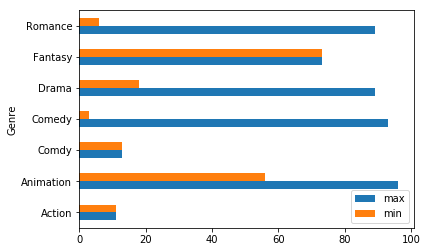

In [152]:
Movies.groupby('Genre')['Dislikes'].agg({'min', 'max'}).drop(['Romence','comedy', 'romance']).plot(kind = 'barh')

Studio_Brand
Independent              118.476823
Warner Bros.              44.714343
Disney                    44.436057
Summit                    31.889810
Fox                       27.069134
Universal                 26.615773
Sony                      19.345304
Paramount                 10.376000
20th Century Fox           5.064621
The Weinstein Company      3.663342
Lionsgate                  3.613018
CBS                        2.202571
New Line                   2.071000
Name: Profit, dtype: float64
['Independent', 'Warner Bros.', 'Disney', 'Summit', 'Fox', 'Universal', 'Sony']


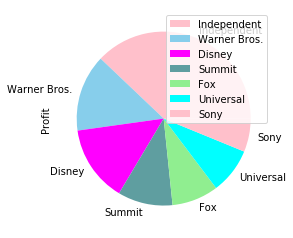

In [153]:
# gathering information on all brands to determine which ones are profiting more than the others
# this information will be used as underlying evidence to determine which genres are most popular with the audiences and profitable 
Brand_Choosing = Movies.groupby(['Studio_Brand'])['Profit'].sum() # what each brand made from 2007 to 2011
Profit_Ratings = Brand_Choosing.sort_values(ascending = False) # order from highest amoun of profit to least
print(Profit_Ratings)
Drop_Bag = [] # for the least earning brands 
Ballers = []
for apps, laps in Profit_Ratings.iteritems():
    if laps < 18:
        Drop_Bag.append(apps) # for use of dropping those brand's that don't fit the logical requirements 
        continue
    else:
        Ballers.append(apps) #for the pies index labels
print(Ballers)
Deals = Profit_Ratings.drop(['Paramount', '20th Century Fox', 'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line'])
colors = ['pink',  'skyblue', 'magenta', 'cadetblue', 'lightgreen', 'cyan']
ax, fig = plt.subplots()

Deals.plot(kind = 'pie', labels = Ballers, colors = colors).legend(Ballers, loc = 'upper right')
# as we can see that the brand Indepedent holds almost half the share 
# it will be more easier to find out which geres of movies are the most popular
# also we must watch out for hidden values such as outliers as one film could be responsible for a large portion of that brands profit 
# Warner Bros. and Disney are choices to strike a comparative analysis from within the groupings in regards to the statement mentions previous 

In [154]:
Loves = Movies.query('Genre == "Romance"')
Lovers = Loves.groupby(['Year'])['Profit'].sum()
Disk = Movies.query('Genre == "Drama"')
Ships = Disk.groupby(['Year'])['Profit'].sum()
Laughs = Movies.query('Genre == "Comedy"')
Apps = Laughs.groupby('Year')['Profit'].sum()
Toons = Movies.query('Genre == "Animation"')
Cars = Toons.groupby(['Year'])['Profit'].sum()

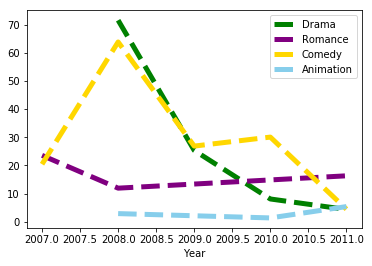

In [155]:
# line plot illustrate a trajectory of the total sum of profits for each year of the listed types of movies
# for the purposes of finding what year each type rised, peaked and began to decline 
fig , ax = plt.subplots()
Ships.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'green', label = 'Drama')
Lovers.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'purple', label = 'Romance')
Apps.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'gold', label = 'Comedy')
Cars.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'skyblue', label = 'Animation')
ax.legend()
plt.show()

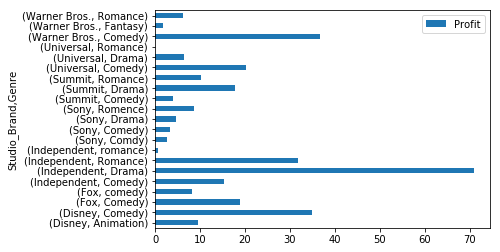

In [222]:
# find out what spefic genre do the highest profit earning brands hold 
Types = Movies.groupby(['Studio_Brand','Genre'])['Genre', 'Profit'].sum()
Typer = Types.drop(['Paramount', '20th Century Fox', 'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line'])
Typer.plot(kind = 'barh')

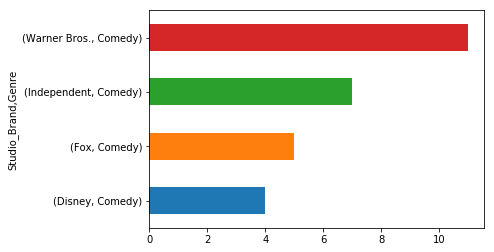

In [176]:
# Which Brands to follow for ideas on Comedy Movies ( competitive analysis )
Alls = Movies.query('Genre == "Comedy"')
Rite = Alls.groupby(['Studio_Brand','Genre'])['Genre'].count()
Ins = Rite.drop(['Paramount',  'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line', 'Universal', 'Summit', 'Sony'])
Most = Alls.groupby(['Studio_Brand', 'Genre'])['Profit'].sum().drop(['Paramount',  'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line', 'Universal', 'Summit', 'Sony'])
Ins.plot(kind = 'barh')

Studio_Brand
20th Century Fox         1
Independent              7
Summit                   1
The Weinstein Company    1
Universal                1
Warner Bros.             2
Name: Film, dtype: int64
                          Profit  Global_Gains
Studio_Brand                                  
20th Century Fox        1.983200     39.660000
Independent             4.529666    149.821429
Summit                 10.180027    376.660000
The Weinstein Company   1.747542     41.940000
Universal               0.000000     30.150000
Warner Bros.            3.091920    143.970000


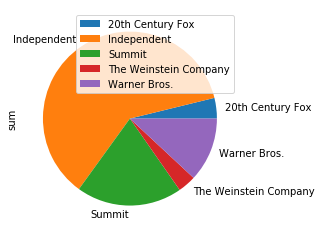

In [229]:

Romances = Movies.loc[(Movies['Genre'] == "Romance")]
Kiss = Romances.groupby(['Studio_Brand'])[['Genre','Profit', 'Film', 'Global_Gains']]
print(Romances.groupby(['Studio_Brand']).Film.count())
print(Kiss.mean())
Routes = Kiss.agg(['sum']).drop(['Universal'])
Routes.plot(kind ='pie', y = 'Profit').legend(loc = 'upper right')

In [169]:
Profit_Trips = Movies.describe().loc['75%', 'Profit']
print(Profit_Trips)
Juice = Movies.loc[(Movies['Dislikes'] < 45) ]
print(Juice.Profit.mean())
# both averages are very close and illustrates that movies that endure less criticism hold a higher return on profit 

4.5353375
4.986296059105264


AxesSubplot(0.125,0.125;0.775x0.755)


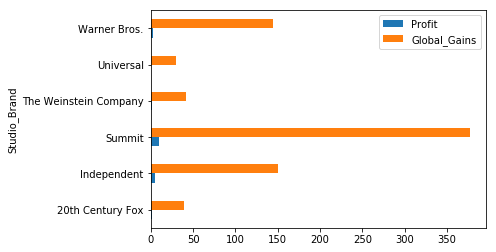

In [230]:
print(Kiss.mean().plot(kind = 'barh'))

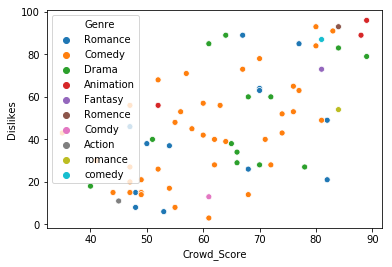

In [189]:
# find out if there is a correlation among likes and dislikes 
sns.scatterplot(x = 'Crowd_Score', y = 'Dislikes', data = Movies, hue =  'Genre')
# there is no relationships as the more dislikes unfourtunately increases along with  likes 
# a low dislike score contributes to good ratings 

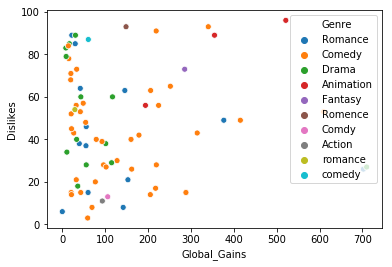

In [192]:
# high amount of dislikes caused by low gains
sns.scatterplot(y = 'Dislikes', x = 'Global_Gains', data = Movies, hue = 'Genre')
# while the majority of films lie under 100 the majority of the movies past that cap actualluy have more than less dislikes

In [218]:
Nist = Movies.loc[(Movies['Global_Gains'] < 100)]
print(Nist.Dislikes.mean())
Mist =  Movies.loc[(Movies['Global_Gains'] > 200)]
print(Mist.Profit.mean())

47.11904761904762
6.457627508684212


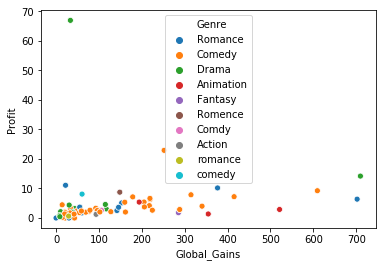

In [195]:
# will a low global gain contribute to low returns on the profit 
sns.scatterplot(y = 'Profit', x = 'Global_Gains', data = Movies, hue = 'Genre')
# it does show that higeher gains contribute to a return on profit over the average mean 
# the majority of films gain less than 100 and hold profits lying under than overall mean 

In [211]:
print(Movies.Profit.mean())
Oceans = Movies.loc[(Movies['Profit'] < 4.52), 'Global_Gains']
print(Oceans.count()) # More than half 


4.527170607426666
56


In [170]:
Dislikes_Sings = Movies.describe().loc['25%', 'Dislikes'] # score under the first quartile
print(Dislikes_Sings)
Dis_Songs = Movies.loc[(Movies['Dislikes'] < 26.0) & (Movies['Profit'] > 5.1)] # Dislikes under Q1 and Profits over Q3
print(Dis_Songs.Profit.mean()) # Just above the score 
print(Dis_Songs[['Studio_Brand', 'Genre', 'Profit', 'Dislikes', 'Global_Gains']]) # only two films 
# critisims has no large influence on the amount of earnings are profited 

26.0
5.2528742059999995
   Studio_Brand    Genre    Profit  Dislikes  Global_Gains
13  Independent   Comedy  5.402632        14        205.30
31  Independent  Romance  5.103117        21        153.09


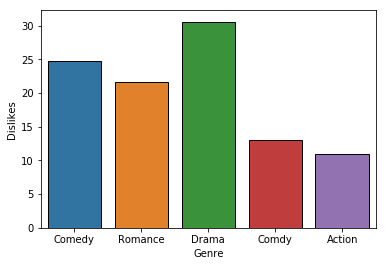

In [168]:
sns.barplot(x = 'Genre', y = 'Dislikes', data = Movies.loc[(Movies['Dislikes'] < 45)],
            estimator = np.mean, ci = False, edgecolor = 'black')
plt.show()
# Use loc to make a more clear and concise illustration
# goal is to find out which more overall had the least amount of dislikes
# tt turns out to be drama 
# with this information I want to find out if a low dislike rating results in higher returns on profits 

Comedy 5
Drama 2
Romance 2


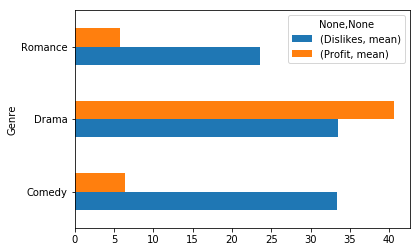

In [171]:
# instead I'll incoporate additional films that lie under the median of Dislikes 
Bits = Movies.loc[(Movies['Dislikes'] < 45) & (Movies['Profit'] > 5.1)]
for Coins, Sparks  in Bits.groupby(['Genre'])['Film'].count().iteritems():
    print(Coins, Sparks) # deliver an accurate count of each specific type of movie
# 
Bits.groupby(['Genre'])[['Dislikes', 'Profit']].agg(['mean']).plot(kind = 'barh')

In [ ]:
# I chose these questions due to to the businessn requirements of finding out which films generate the most profits and popularity
# It will provide greater insight for Microsoft prior to enterign the Movie Industry
# I decided on the data cleaning options based on the end goal of wich data  manipulation techinque would I need to choose to fit the calculation
# This libary provided mre with the most resources in comparison to the latters 
# These visualizations illustrated the dymamics of the indutry and it's Key Performance Indicators 
# Those feature predictors were most versitile and could be used with more than one differntial variable
# the results are clear within teh visualizations and those specific genres and brands gives us a clear illustration of what types of movies are most suitable 
# I'm very confident and feel that this will bring in a large amount of market share 
# Bad formatted with the data. In an information economu the data is apart of the businesses critical infrasructure and powers it
